# Goal

The following notebook shows use of simple sine signal generation practice from [BasicGenerator.py](BasicGenerator.py)

After that [SincPsd.py](SincPsd.py) is used to process the signal and [SignalPsdPlotter.py](SignalPsdPlotter.py) is used to plot it.


In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib

import metrics.BasicGenerator as BasicGenerator
from metrics.SignalPsdPlotter import SignalPsdPlotter
import metrics.SincPsd as SincPsd

# Use Instruction
## Signal generation

See [Signal generation](#Signal-generation) section.

A synthetic signal, albeit not a very good one, can be using two calls.

First we establish the underlying combination of sin signals.

Then we check how well it hits thresholds that indicate heartbeats.

In [10]:
frequencies = [0.15, 0.35, 0.45]
magnitudes = [1, 0.5, 0.3]

signal = BasicGenerator.generate_combined_sines(frequencies, magnitudes)


sampled_HRV_signal = BasicGenerator.generate_sin_HRV(signal)

## Interpolation, PSD, and Windowing


These are only useful, when you want to transform the signal into the frequency domain.

Interpolation, Windowing, and PSD can be achieved by a single call.

See the [Sinc interpolation](#Sinc-interpolation) and [windowing](#windowing) on their individual use

In [11]:
FFT_input_signal, PSD = SincPsd.sinc_and_psd(sampled_HRV_signal, window = 'hann', window_fraction = 1/16)

## Plotting
Plotting a signal and its PSd requires initiating the plotter and inputting both variables.

Multiple signals can be added.

Manual call for showing the plot is needed.

In [12]:



plotter = SignalPsdPlotter()

plotter.plot_signal_and_psd(FFT_input_signal, PSD, "interpolated signal", color='red')

plotter.plot_signal_and_psd(signal, SincPsd.signal_to_PSD(signal), "original signal", color='blue')

plotter.show()

# Signal generation

## Sine generation

Of the two main frequency components of HRV, namely low-frequency (LF, 0.04-0.15 Hz) and high-frequency (HF, 0.15-0.4 Hz) components.

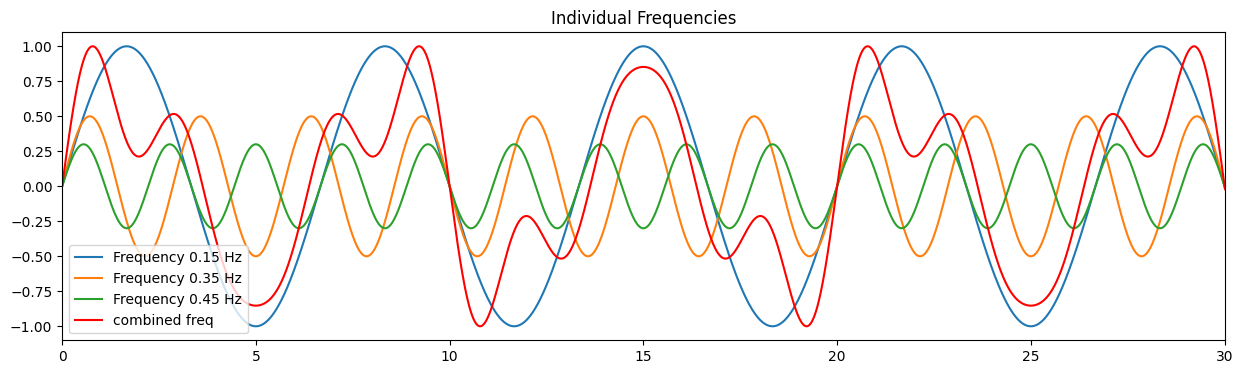

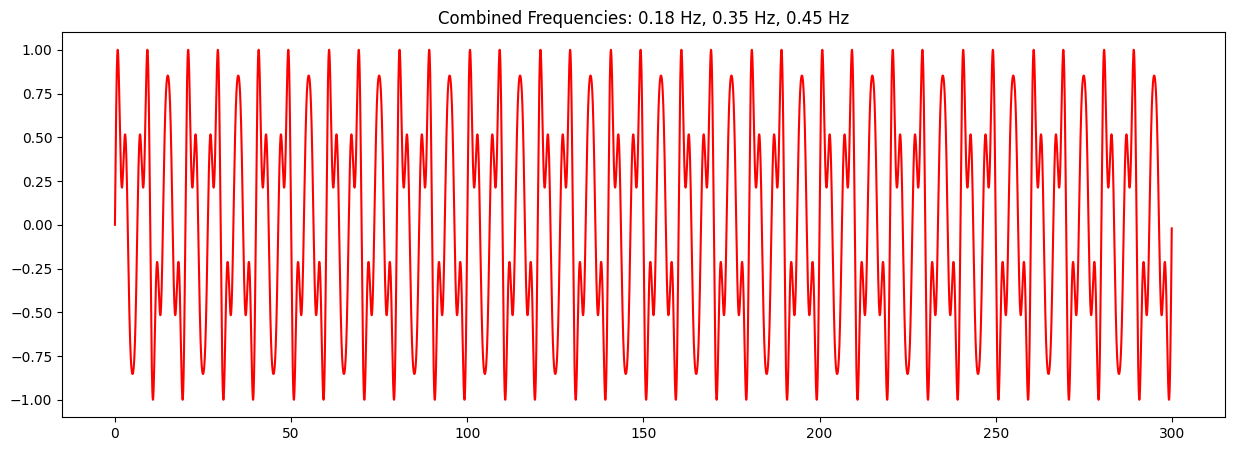

In [13]:



frequencies = [0.15, 0.35, 0.45]
magnitudes = [1, 0.5, 0.3]

signal = BasicGenerator.generate_combined_sines(frequencies, magnitudes)

plt.figure(figsize=(15, 4))
plt.xlim(0, 30)

# Combine frequencies and plot the resulting signal
for (freq, mag) in zip(frequencies, magnitudes):
    plt.plot(BasicGenerator.create_single_frequency(freq, mag), label=f'Frequency {freq} Hz')
plt.plot(signal,label='combined freq', color='r')
plt.legend()
plt.title('Individual Frequencies')
plt.show()

plt.figure(figsize=(15, 5))
plt.plot(signal, color='r')
plt.title('Combined Frequencies: 0.18 Hz, 0.35 Hz, 0.45 Hz')
plt.show()

Note that the very act of using a digital system introduces high frequency components in fft
My own class to simplify plotting singal and its psd

# Sinc Interpolation

Sinc (Whitetaker-Shanon interpolation) can be found in [sinc_interpolation.py](sinc_interpolation.py)
Also a plotting tool for it at 

Altough, Sinc (whitetaker-Shanon) interpolation distorsts the signal in the time domain. Normalized PSD is identical to the orginal signal.

In [14]:

signal=signal
original_psd = SincPsd.signal_to_PSD(signal, 100)

indices = np.linspace(0, len(signal) - 1, 400, dtype=int)
sampled_signal = signal.iloc[indices]
psd_sampled = SincPsd.signal_to_PSD(sampled_signal,400/300)

random_sample = signal.sample(n=600, random_state=1).sort_index()
psd_random = SincPsd.signal_to_PSD(random_sample,2)
            
sinc_signal = SincPsd.sinc_interpolate(random_sample)
_, sinc_psd = SincPsd.sinc_and_psd(random_sample)


plotter = SignalPsdPlotter()

plotter.plot_signal_and_psd(signal, original_psd, 'Original Signal', 'green')
plotter.plot_signal_and_psd(sinc_signal, sinc_psd, 'Sinc Interpolation', 'black')
plotter.plot_signal_and_psd(sampled_signal, psd_sampled, 'Constant Sampled Signal', 'blue')
plotter.plot_signal_and_psd(random_sample, psd_random, 'Random Sampled Signal', 'red')

plotter.show()

# HRV sine synthesis


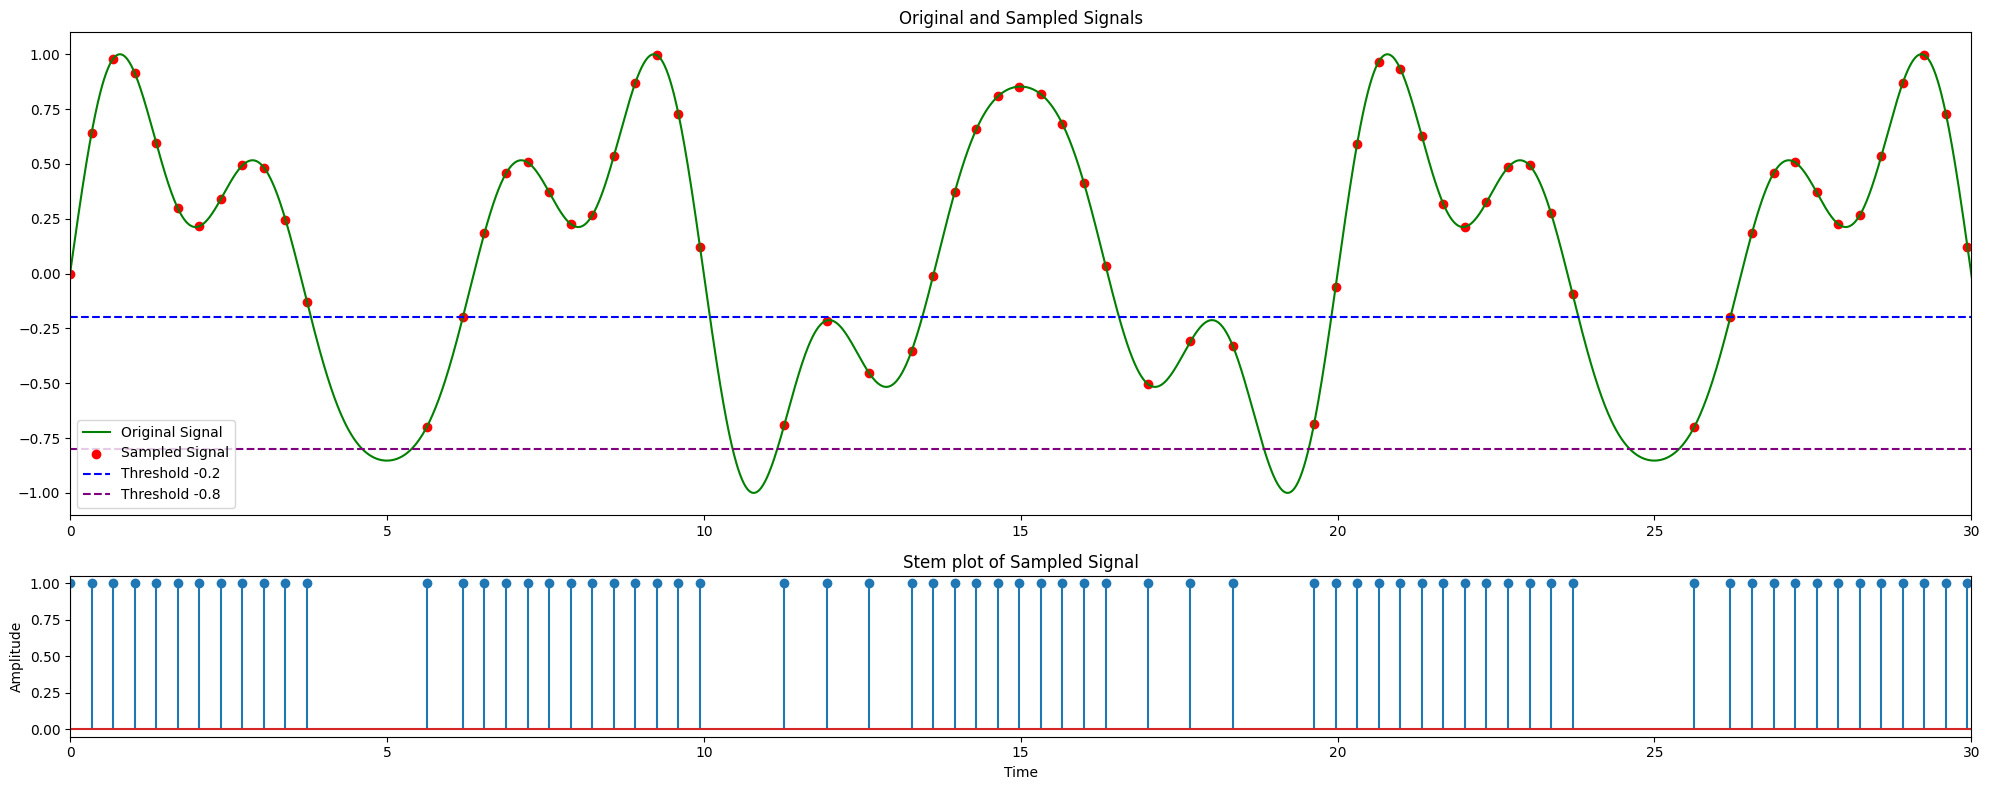

In [15]:
frequencies = [0.15, 0.35, 0.45]
magnitudes = [1, 0.5, 0.3]

signal = BasicGenerator.generate_combined_sines(frequencies, magnitudes)

sampled_signal = BasicGenerator.generate_sin_HRV(signal)

fig, axs = plt.subplots(2, 1, figsize=(20, 8), gridspec_kw={'height_ratios': [3, 1]})

# Plot the original and sampled signals
axs[0].plot(signal, label='Original Signal', color='green')
axs[0].scatter(sampled_signal.index, sampled_signal.values, color='red', label='Sampled Signal')
axs[0].set_xlim(0, 30)
axs[0].legend()
axs[0].set_title('Original and Sampled Signals')

# Plot the stem plot of the sampled signal
axs[1].stem(sampled_signal.index, np.ones_like(sampled_signal.values))
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Stem plot of Sampled Signal')
axs[1].set_xlim(0, 30)

# Draw horizontal lines at -0.2 and -0.8
axs[0].axhline(y=-0.2, color='blue', linestyle='--', label='Threshold -0.2')
axs[0].axhline(y=-0.8, color='purple', linestyle='--', label='Threshold -0.8')
axs[0].legend()

plt.tight_layout()
plt.show()

# windowing


In [16]:
original_psd = SincPsd.signal_to_PSD(signal, 100)
sinc_signal, sinc_psd = SincPsd.sinc_and_psd(random_sample)

simulation_test = SignalPsdPlotter()
simulation_test.plot_signal_and_psd(signal, original_psd, 'original', 'green')
simulation_test.plot_signal_and_psd(sinc_signal, sinc_psd, 'resampled', 'black')

windowed_signal = SincPsd.window_func(sinc_signal, 'sin', 1/16)
HRV_sampling_freq = 1 / sinc_signal.index.to_series().diff()
windowed_psd = SincPsd.signal_to_PSD(windowed_signal, HRV_sampling_freq)

simulation_test.plot_signal_and_psd(windowed_signal, windowed_psd, 'windowed', 'red')
simulation_test.show()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\326po\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\326po\AppData\Local\Temp\ipykernel_2508\1998803099.py", line 10, in <module>
    windowed_psd = SincPsd.signal_to_PSD(windowed_signal, HRV_sampling_freq)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\GITHUB\HRV\HRV-EDA\metrics\SincPsd.py", line 28, in signal_to_PSD
    f, S = welch(signal, fs=sampling_freq, nperseg=n_per_seg)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\326po\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\signal\_spectral_py.py", line 652, in welch
    freqs, Pxx = csd(x, x, fs=fs, window=window, nperseg=nperseg,
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\326po\AppData\Local\Programs\Python\Python311\Lib\site

# Min max approach
Following attempts of achieving the same using local maxima and minima.
It is quite useless, since the spectra looks nothing like it should.


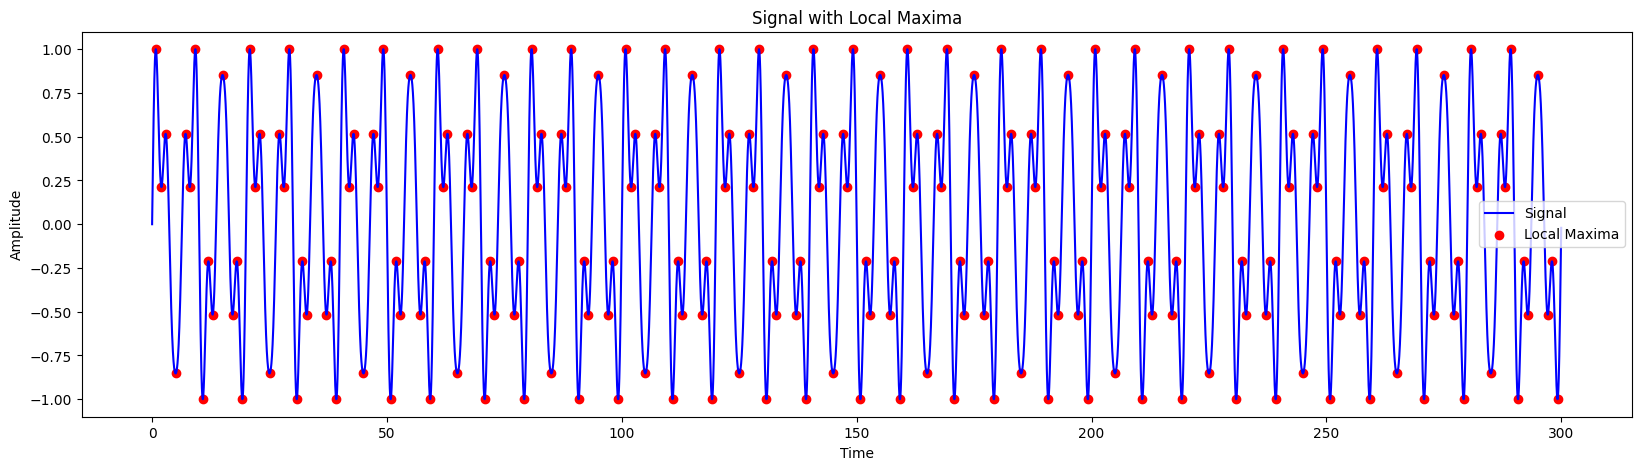

In [25]:
def find_peaks(signal):
    local_maxima = signal[(signal.shift(1) < signal) & (signal.shift(-1) < signal)]
    local_minima = signal[(signal.shift(1) > signal) & (signal.shift(-1) > signal)]
    peaks = pd.concat([local_maxima, local_minima]).sort_index()
    return peaks

peaks = find_peaks(signal)

plt.figure(figsize = (20, 5))
plt.plot(signal, label = 'Signal', color = 'blue')
plt.scatter(peaks.index, peaks.values, color = 'red', label = 'Local Maxima')
plt.title('Signal with Local Maxima')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.show()

In [26]:


HRV_peaks = peaks
PEAK_PSD = SincPsd.signal_to_PSD(peaks)
resampled_HRV_peaks = SincPsd.window_func(SincPsd.sinc_interpolate(HRV_peaks))
_, resampled_psd_peaks = SincPsd.sinc_and_psd(resampled_HRV_peaks)


plotter = SignalPsdPlotter("HRV signal and PSD simulated by maxima and minima sampling")

plotter.plot_signal_and_psd(HRV_peaks, resampled_psd_peaks, 'HRV Peaks', 'red')
plotter.plot_signal_and_psd(resampled_HRV_peaks, resampled_psd_peaks, 'Resampled HRV Peaks', 'blue')

plotter.show()


hann window applied over:
left: index 0 to 5
right: index 203 to 210
